In [34]:
#import required libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time 

In [35]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Faces found:  1


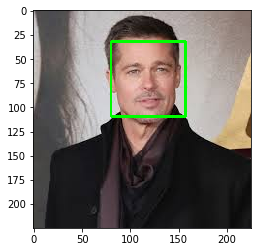

In [36]:
# ### Code - Haar Cascade Classifier

# XML training files for Haar cascade are stored in `opencv/data/haarcascades/` folder.
# 
# First we need to load the required XML classifier. Then load our input image in grayscale mode. Many operations in OpenCV **are done in grayscale**.

#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

#load test iamge
test1 = cv2.imread('1.jpeg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

#display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#or if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')


# Now we find the faces in the image with **`detectMultiScale`**. If faces are found, this function returns the positions of detected faces as Rect(x,y,w,h).

# In[4]:

#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))


# Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces. 


#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)


# Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 


#conver image to RGB and show image
plt.imshow(convertToRGB(test1))





In [37]:

# ### Grouping Code into a Function

# It would be easy and reusable if we grouped this code into a function so let's make a function out of this code.


def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy




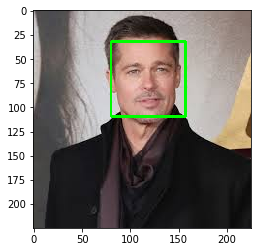

In [39]:
# Now let's try this function on another test image. 

# In[8]:

#load another image
test2 = cv2.imread('1.jpeg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))



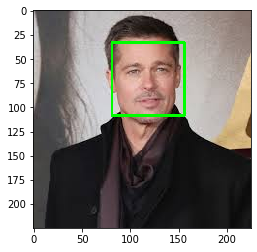

In [40]:

# ### `detectMultiScale` Parameter Details

# This function detects the faces in a given test image and following are details of its options.
# 
# * **`detectMultiScale`:** A general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. The first option is the grayscale image.
# 
# * **`scaleFactor`:** Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.
# 
# * **`minNeighbors`:** The detection algorithm uses a moving window to detect objects. This parameter defines how many objects are detected near the current one before it declares the face found.  
# 
# There are other parameters as well and you can review the full details of this function [here](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale). These parameters need to be tuned according to your data. 
# 
# For example let's try our `Haar` face detector on another test image. 

# In[9]:

#load another image
test2 = cv2.imread('1.jpeg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


# Well, we got two false positives. What went wrong there? Remember, some faces may be closer to the camera and they would appear bigger than those faces in the back. The scale factor compensates for this so can tweak that parameter. For example, `scaleFactor=1.2` improved the results.

# In[10]:

#load another image
test2 = cv2.imread('1.jpeg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))



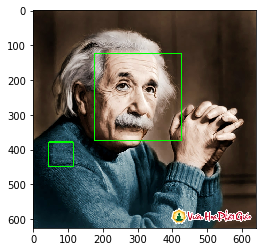

In [44]:

# So you have to tune these parameters according to information you have about your data.

# ### Code - LBP Cascade Classifier

# XML files for LBP cascade are stored in `opencv/data/lbpcascades/` folder.
# 
# From coding perspective you don't have to change anything except, instead of loading the `Haar` classifier training file you have to load the `LBP` training file and rest of the code is same. 

# In[11]:

#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('1.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


# Let's try it on another test image. 

# In[12]:

#load test image
test2 = cv2.imread('1.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


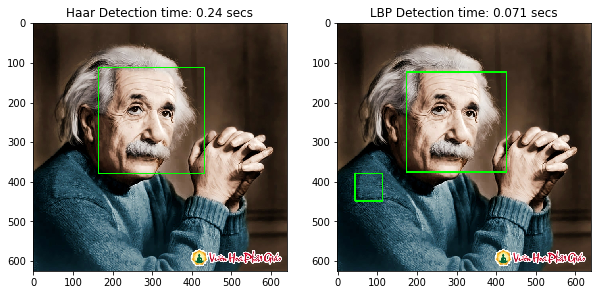

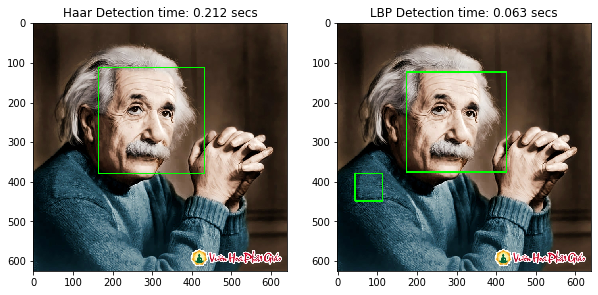

In [43]:


# ## Haar and LBP Results Analysis

# We will run both `Haar` and `LBP` on test images to see accuracy and time delay of each.

# In[13]:

#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('1.jpg')
#load test image2
test2 = cv2.imread('1.jpg')


# ### Test-1

# In[16]:

#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)


# - **Accuracy:** `Haar` detected more faces and than `LBP`.
# - **Speed:** `LBP` was faster than `Haar`.

# ### Test-2 

# In[17]:

#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)


# - **Accuracy:** Both `Haar` and `LBP` detected faces successfully. 
# - **Speed:** `LBP` was significantly faster than `Haar`.

# ## End Notes

# As you can see `LBP` is significantly faster than `Haar` and not that much behind in accuracy so depending on the needs of your application you can use any of the above-mentioned face detection algorithms. Try the code and have fun detecting different faces and analyzing the result. And don't forget to thank OpenCV for giving the implementation of the above-mentioned algorithms.
# 
# Face detection has rich real-time applications that include facial recognition, emotions detection (smile detection), facial features detection (like eyes), face tracking etc. You can also explore more exciting machine learning and computer vision algorithms available in OpenCV library.  
